In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\HP\Documents\INCOME_ANALYSIS_PROJECT\income_evaluation.csv")

In [5]:
data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [9]:
data.reshap

(32561, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [22]:
# Data Quality Analysis - Missing Value Count by Feature
data.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [26]:
#check duplicates 
data.duplicated().sum()

np.int64(0)

In [25]:
#drop duplicates 
data.drop_duplicates(inplace = True )

In [43]:
data.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [39]:
# we are analyzing what factors determine the income be greater than $50k
# 1 Univariate (Basics)
data['income'].value_counts(normalize=True)

income
<=50K    0.759074
>50K     0.240926
Name: proportion, dtype: float64

In [42]:
#data cleansing step - to remove spaces and putting everything lower letters for better analysis
data.columns = data.columns.str.strip().str.lower().str.replace('-', '_')

In [44]:
data.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<Axes: ylabel='education'>

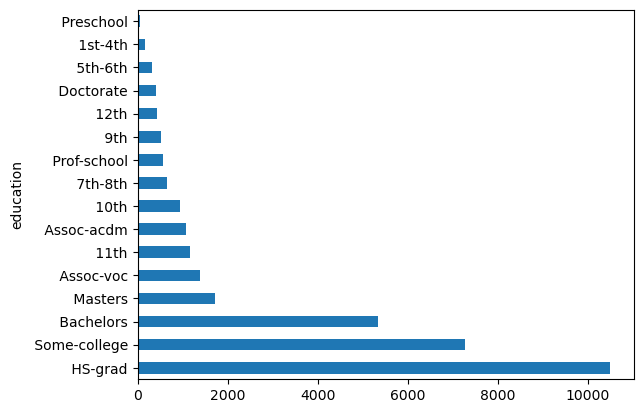

In [52]:
data['education'].value_counts().plot(kind='barh')


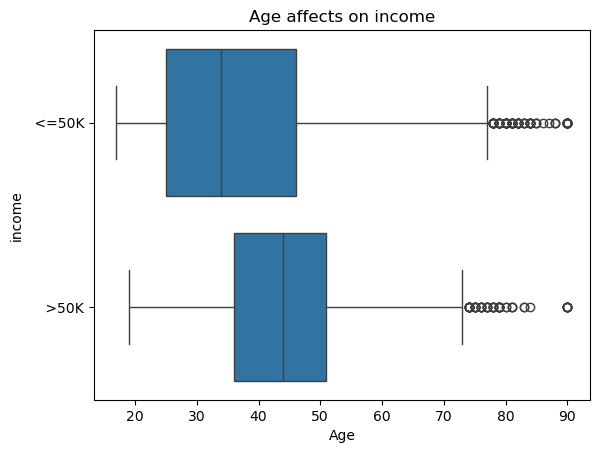

In [55]:
# 2 Bivariate (e.g. age vs income)
sns.boxplot(data = data , x = 'age' , y = 'income')
plt.title("Age affects on income")
plt.xlabel("Age")
plt.ylabel("income")
plt.show()

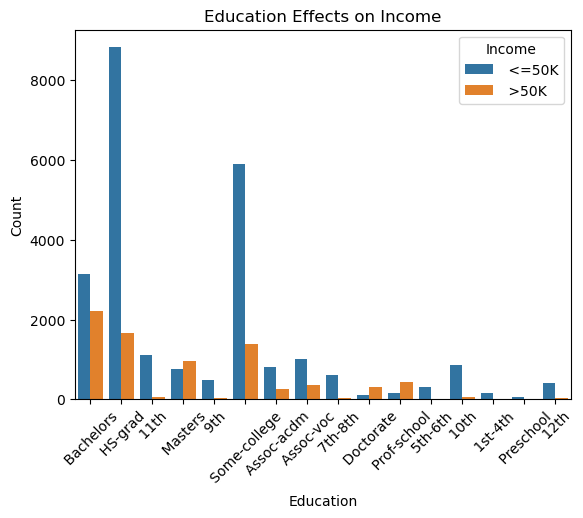

In [61]:
sns.countplot(x='education', hue='income', data=data)
plt.title("Education Effects on Income")
plt.xlabel("Education")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.show()

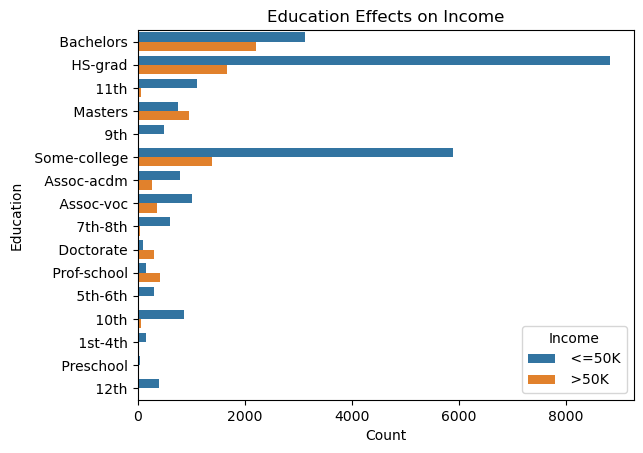

In [62]:
sns.countplot(y='education', hue='income', data=data)
plt.title("Education Effects on Income")
plt.xlabel("Count")
plt.ylabel("Education")
plt.legend(title="Income")
plt.show()

In [78]:
#earning based on each education 
data.groupby(["education"])["income"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
 

education     income
10th          <=50K      93.4%
              >50K        6.6%
11th          <=50K      94.9%
              >50K        5.1%
12th          <=50K      92.4%
              >50K        7.6%
1st-4th       <=50K      96.4%
              >50K        3.6%
5th-6th       <=50K      95.2%
              >50K        4.8%
7th-8th       <=50K      93.8%
              >50K        6.2%
9th           <=50K      94.7%
              >50K        5.3%
Assoc-acdm    <=50K      75.2%
              >50K       24.8%
Assoc-voc     <=50K      73.9%
              >50K       26.1%
Bachelors     <=50K      58.5%
              >50K       41.5%
Doctorate     >50K       74.1%
              <=50K      25.9%
HS-grad       <=50K      84.0%
              >50K       16.0%
Masters       >50K       55.7%
              <=50K      44.3%
Preschool     <=50K     100.0%
Prof-school   >50K       73.4%
              <=50K      26.6%
Some-college  <=50K      81.0%
              >50K       19.0%
Name: proportion, 

In [79]:
#sex affecting income potential 
data.groupby(["sex"])["income"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

sex     income
Female  <=50K     89.0%
        >50K      11.0%
Male    <=50K     69.4%
        >50K      30.6%
Name: proportion, dtype: object

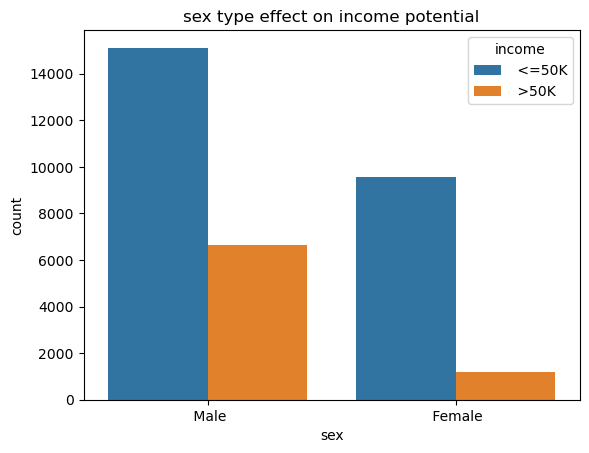

In [81]:
#plot of how sex affects income potential
sns.countplot(data = data , x="sex" , hue="income")
plt.title("sex type effect on income potential")
plt.show()

In [83]:
#how marital status influence income potential
data.groupby('marital_status')['income'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


marital_status         income
Divorced               <=50K     89.6%
                       >50K      10.4%
Married-AF-spouse      <=50K     56.5%
                       >50K      43.5%
Married-civ-spouse     <=50K     55.3%
                       >50K      44.7%
Married-spouse-absent  <=50K     91.9%
                       >50K       8.1%
Never-married          <=50K     95.4%
                       >50K       4.6%
Separated              <=50K     93.6%
                       >50K       6.4%
Widowed                <=50K     91.4%
                       >50K       8.6%
Name: proportion, dtype: object

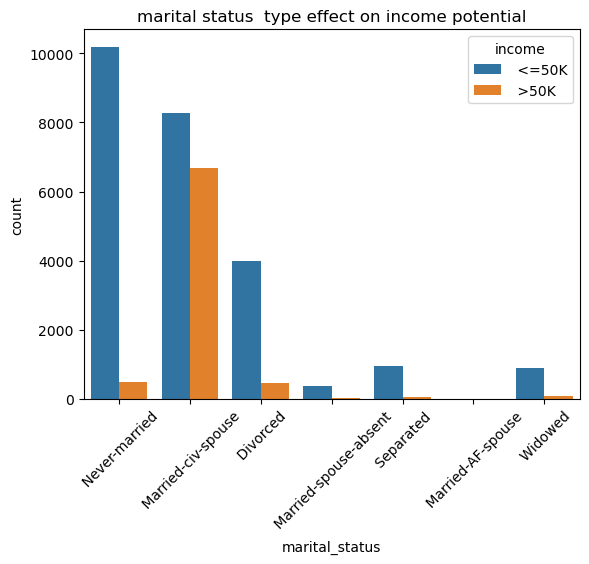

In [86]:
#plot of how sex affects income potential
sns.countplot(data = data , x="marital_status" , hue="income")
plt.title("marital status  type effect on income potential")
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

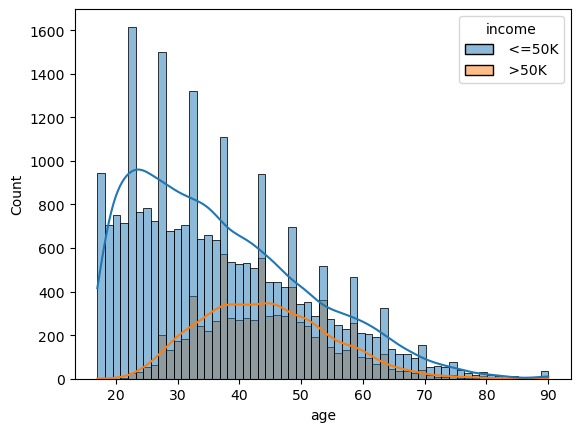

In [91]:
# Visual Income Distribution
sns.histplot(data=data, x='age', hue='income', kde=True)

<Axes: xlabel='income', ylabel='hours_per_week'>

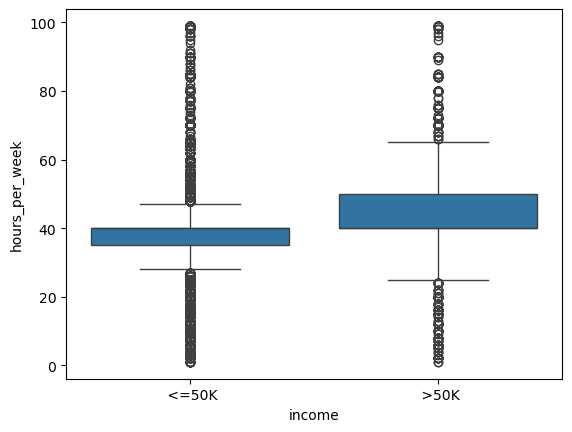

In [92]:
sns.boxplot(data=data , x='income' , y="hours_per_week")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

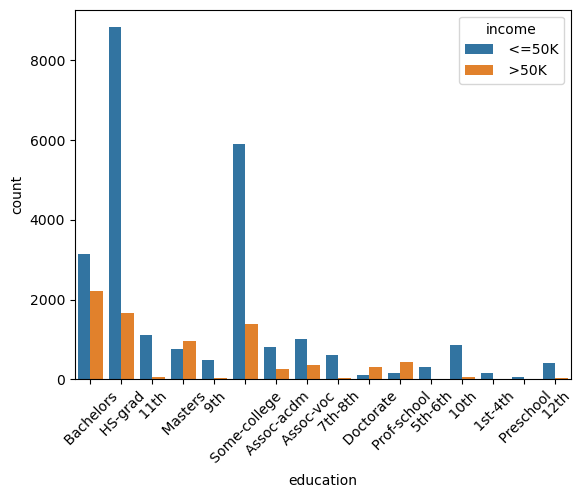

In [95]:
sns.countplot(data =data , x='education' , hue='income')
plt.xticks(rotation = 45)

In [96]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [115]:
#how occupation influence income potentials 
grouped_data = data.groupby(['occupation'])['income'].value_counts(normalize=True).mul(100).round(1).astype('str') + '%'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

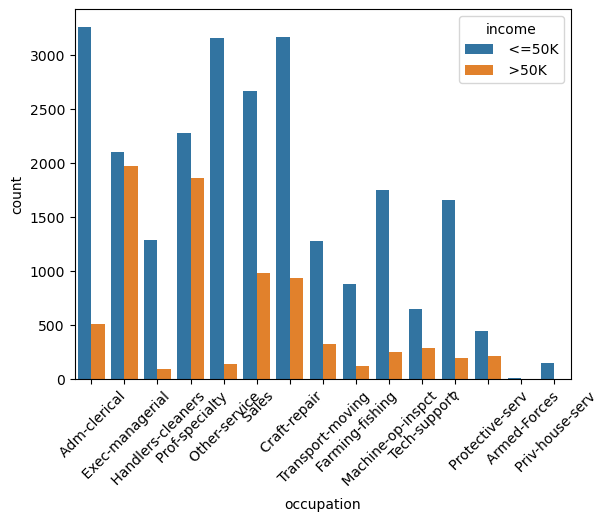

In [114]:
sns.countplot(data = data , x='occupation' , hue='income')
plt.xticks(rotation=45)

In [116]:
# 3. Feature Correlation (Numerical only)



#from next cell 

In [118]:
data['income_binary'] = data['income'].map({'<=50k': 0 , '>50k':1})

In [121]:
data.corr(numeric_only=True)['income_binary'].sort_values(ascending=False)


age              NaN
fnlwgt           NaN
education_num    NaN
capital_gain     NaN
capital_loss     NaN
hours_per_week   NaN
income_binary    NaN
Name: income_binary, dtype: float64

In [134]:
#visualizing capital gain

data['has_capital_gain'] = data['capital_gain'].apply(lambda x: x > 0)

In [140]:
data['has_capital_gain'].value_counts()

has_capital_gain
False    29825
True      2712
Name: count, dtype: int64

In [152]:
data.groupby('income')['has_capital_gain'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


income  has_capital_gain
<=50K   False               95.8%
        True                 4.2%
>50K    False               78.6%
        True                21.4%
Name: proportion, dtype: object

<Axes: xlabel='income', ylabel='count'>

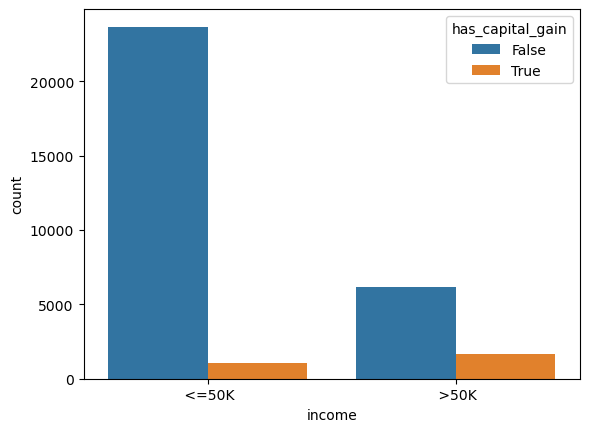

In [161]:
sns.countplot(data=data , x="income" , hue="has_capital_gain")

In [163]:
#visualizing capital loss
data['has_capital_loss'] = data['capital_loss'].apply(lambda x:x>0)


In [164]:
data.groupby('income')['has_capital_loss'].value_counts(normalize=True).mul(100).round(1).astype('str') + '%' 

income  has_capital_loss
<=50K   False               97.0%
        True                 3.0%
>50K    False               90.1%
        True                 9.9%
Name: proportion, dtype: object

<Axes: xlabel='income', ylabel='count'>

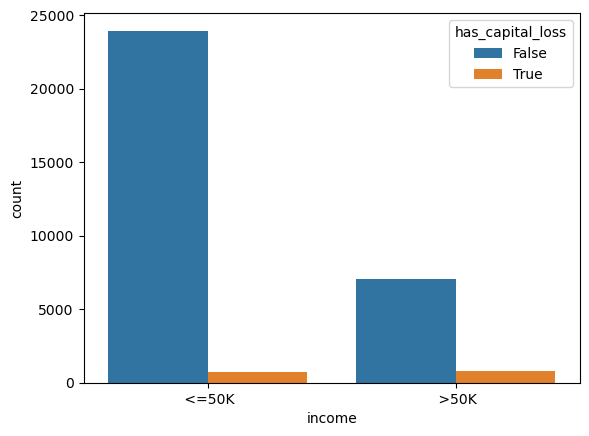

In [166]:
sns.countplot(x="income" , hue="has_capital_loss" , data = data)

<Axes: xlabel='hours_per_week', ylabel='Count'>

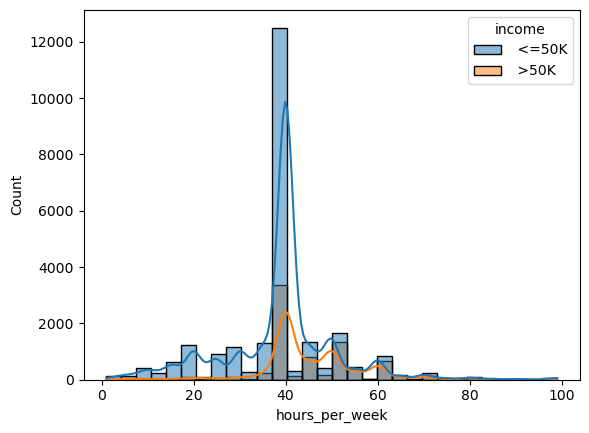

In [173]:
 # Hours Worked vs Income
 
sns.histplot(data=data, x='hours_per_week', hue='income', kde=True , bins=30)

In [180]:
# Country-wise Comparison

top_countries = data['native_country'].value_counts().head(10).index
top_countries


Index([' United-States', ' Mexico', ' ?', ' Philippines', ' Germany',
       ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba'],
      dtype='object', name='native_country')

<Axes: xlabel='count', ylabel='native_country'>

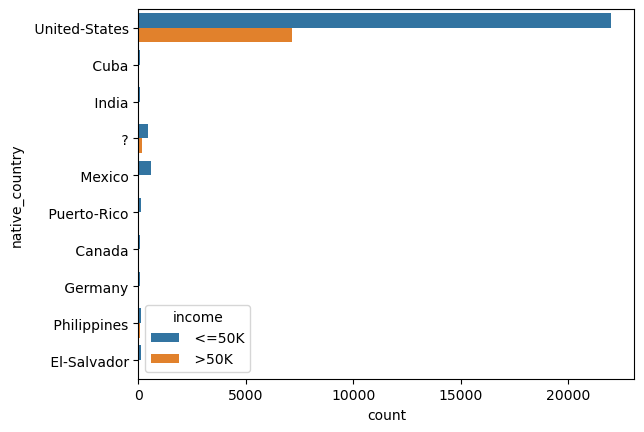

In [182]:
sns.countplot(data=data[data['native_country'].isin(top_countries)],
              y='native_country', hue='income')

In [188]:
data.groupby(['relationship', 'sex'])['income'].value_counts(normalize=True).mul(100).round(1).astype('str') + '%'


relationship    sex     income
Husband         Female  <=50K     100.0%
                Male    <=50K      55.1%
                        >50K       44.9%
Not-in-family   Female  <=50K      92.7%
                        >50K        7.3%
                Male    <=50K      87.1%
                        >50K       12.9%
Other-relative  Female  <=50K      96.7%
                        >50K        3.3%
                Male    <=50K      95.8%
                        >50K        4.2%
Own-child       Female  <=50K      98.9%
                        >50K        1.1%
                Male    <=50K      98.5%
                        >50K        1.5%
Unmarried       Female  <=50K      95.8%
                        >50K        4.2%
                Male    <=50K      86.6%
                        >50K       13.4%
Wife            Female  <=50K      52.5%
                        >50K       47.5%
                Male    <=50K      50.0%
                        >50K       50.0%
Name: proportion, dtype: o

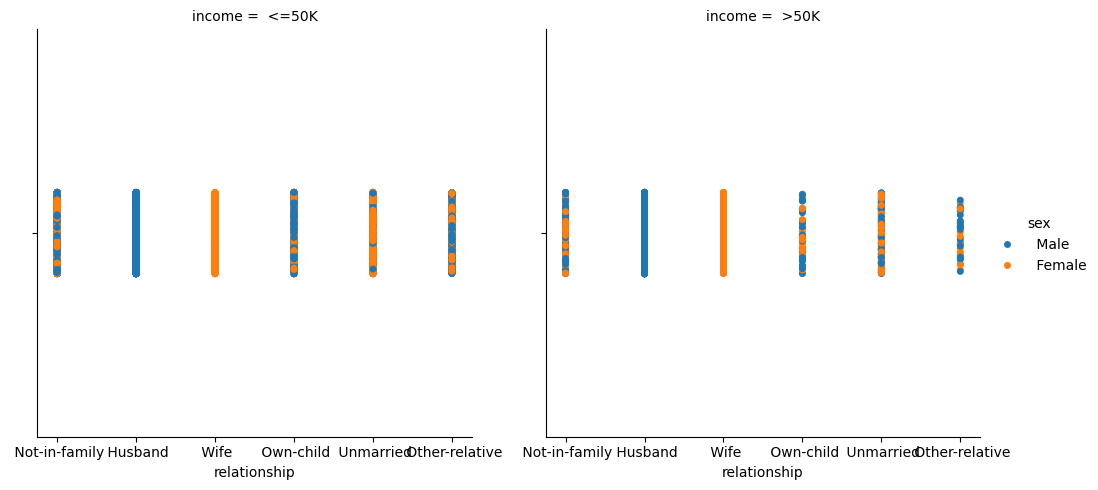

In [191]:
# Suppose you have a DataFrame in 'df' with columns 'relationship', 'sex', 'income', 'proportion'
sns.catplot(
    data=data,
    x="relationship", hue="sex",
    col="income"  # optional: use col or row to facet by income level
)
plt.show()

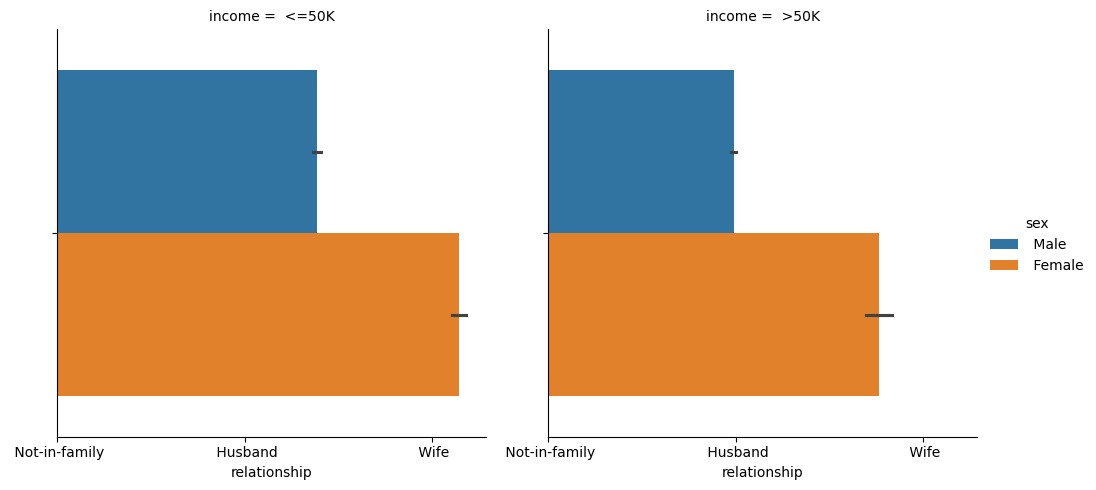

In [197]:
sns.catplot(
    data=data,
    x="relationship", hue="sex", kind='bar',
    col="income"  # optional: use col or row to facet by income level
)
plt.show()

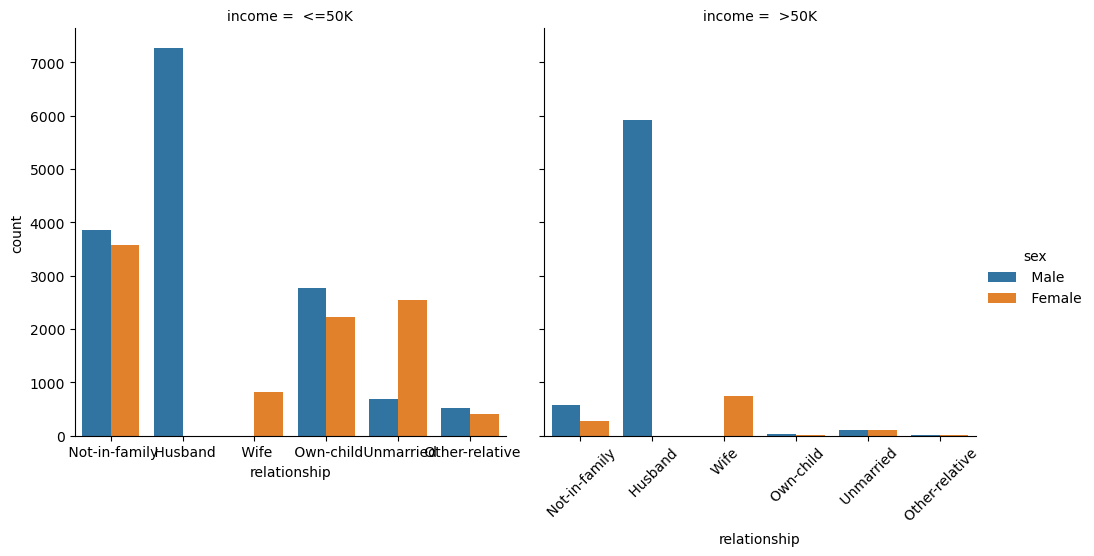

In [206]:
sns.catplot(x="relationship",
                kind="count",hue="sex",col="income",
                data=data)
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

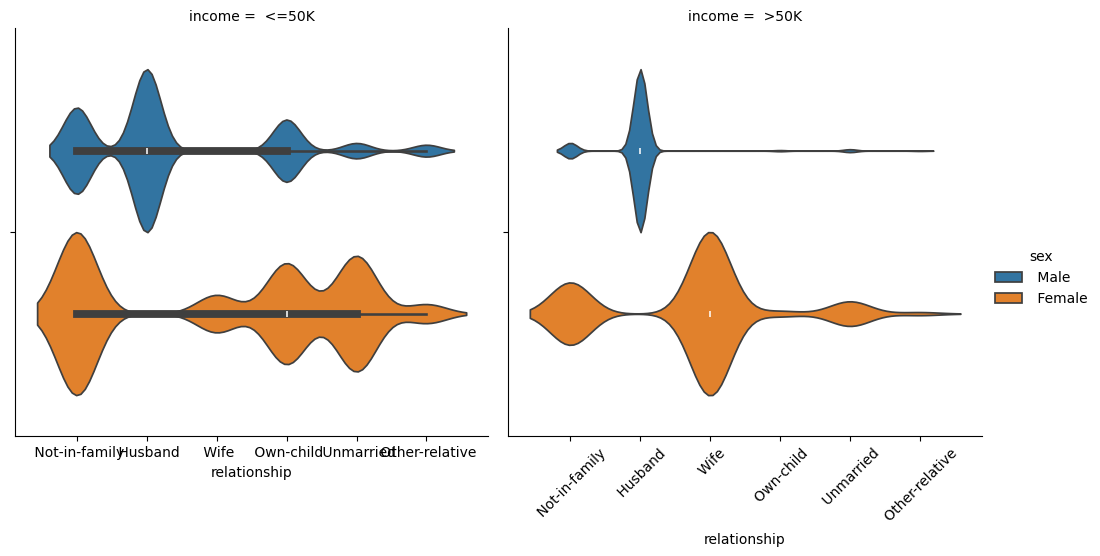

In [208]:
sns.catplot(
    data=data,
    x="relationship", hue="sex", kind='violin',
    col="income"  # optional: use col or row to facet by income level
)
plt.xticks(rotation=45)
plt.show()

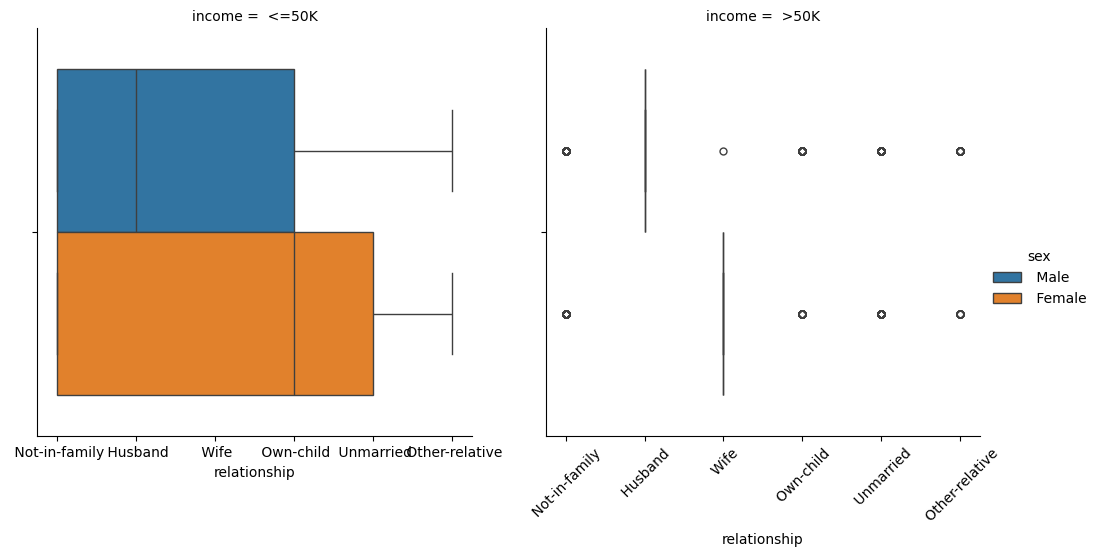

In [214]:
sns.catplot(
    data=data,
    x="relationship", hue="sex", kind='box',
    col="income"  # optional: use col or row to facet by income level
)
plt.xticks(rotation=45)
plt.show()